In [1]:
# Diploma generator for martial arts ranks
# For when you don't quickly have access to image editing tools

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [3]:
def add_on_top(offset_x, offset_y, background, patch):
    x1 = offset_x
    x2 = offset_x + np.shape(patch)[1]
    y1 = offset_y
    y2 = offset_y + np.shape(patch)[0]
    new_bg = np.copy(background)
    if np.shape(patch)[2] > 3:
        # 4-th channel as alpha
        alpha_p = patch[:,:,3] / 255.0
        alpha_bg = 1.0 - alpha_p
        for channel in range(0,3):
            new_bg[y1:y2, x1:x2, channel] = (alpha_p * patch[:, :, channel] +
                                             alpha_bg * new_bg[y1:y2, x1:x2, channel])
    else:
        new_bg[y1:y2, x1:x2] = patch
    
    return new_bg

def adjust_brightness(image, value):
    new_image = np.copy(image)
    hsv = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)
    np.add(hsv[:,:,2], value, out=hsv[:,:,2], casting="unsafe")
    new_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return new_image

def adjust_saturation(image, value):
    new_image = np.copy(image)
    hsv = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)
    np.add(hsv[:,:,1], value, out=hsv[:,:,1], casting="unsafe")
    new_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return new_image

def adjust_contrast_brightness(image, alpha, beta):
    # alpha(contrast): 1.0-3.0; beta(brightness): 0-100
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def add_participant(participants, first_name, last_name, rank, rank_type, gender, date):
    participants.append({'first_name':first_name, 'last_name':last_name, 
                         'rank':rank, 'rank_type':rank_type, 'gender':gender, 'date':date})

In [4]:
# Parameters
margin = 20
MA_STYLE = "KAISENDO"
club_name = "Club Sportiv Melbax - Iași"
diploma_title = "DIPLOMĂ DE GRAD"
omologat = "OMOLOGAT"
seria_numarul = "Seria....... Nr. .........." 
date = "Data........................."
secretary = "Secretar:"
president = "Președinte C.S. MELBAX"
president_name = "CIOCAN CRISTIAN"
president_rank = "3 DAN KAISENDO"
BLACK = (255,255,255)
font = cv2.FONT_HERSHEY_TRIPLEX
font_size = 1.1
font_color = BLACK
font_thickness = 2
kyu_to_color = {8:"yellow", 7:"orange", 6:"green", 5:"blue", 4:"blue", 3:"purple", 2:"brown", 1:"brown"}

In [5]:
# Add items
BLANK_DATE = '.' * 20
participants = []
add_participant(participants, 'Daniel', 'Gheorghita', 8, 'KYU', 'male', BLANK_DATE)
print(np.shape(participants))

(12,)


In [6]:
# Load images
background = cv2.imread("images/background.jpg")
background = cv2.resize(background,(297*5,210*5))
eagle = cv2.resize(cv2.imread("images/eagle.png",-1),(300,300))
melbax = cv2.resize(cv2.imread("images/melbax.png",-1),(300,300))
kaisendo = cv2.resize(cv2.imread("images/kaisendo.png",-1),(500,250))
yellow_belt = cv2.resize(cv2.imread("images/yellow_belt.png",-1),(300,200))
orange_belt = cv2.resize(cv2.imread("images/orange_belt.png",-1),(300,200))
green_belt = cv2.resize(cv2.imread("images/green_belt.png",-1),(300,200))

In [7]:
# Combine images
background = adjust_contrast_brightness(background, 0.8, 220)
diploma = add_on_top(margin, margin, background, eagle)
diploma = add_on_top(np.shape(diploma)[1]-np.shape(melbax)[1]-margin, margin, diploma, melbax)
#diploma = add_on_top(int(np.shape(diploma)[1]/2)-int(np.shape(yellow_belt)[1]/2), 100, diploma, yellow_belt)
diploma = add_on_top(int(np.shape(diploma)[1]/2)-int(np.shape(kaisendo)[1]/2) - 120, 
                     int(np.shape(diploma)[0])-int(np.shape(kaisendo)[0]) - margin, diploma, kaisendo)

In [8]:
# Add generic text with OpenCV
#diploma_with_text = cv2.putText(diploma, club_name, (330,100), font, 1.8, (0,0,0), font_thickness, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma_with_text, diploma_title, (380,460), font, 2.5, (0,0,0), font_thickness, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, omologat, (1200,480), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, seria_numarul, (1100,520), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, date, (1100,560), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, president, (1000,900), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, president_name, (1000,930), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, president_rank, (1000,960), font, 1, (0,0,0), 1, cv2.LINE_AA)
#diploma_with_text = cv2.putText(diploma, secretary, (200,900), font, 1, (0,0,0), 1, cv2.LINE_AA)

# Add generic text with PIL
font_path = "Library/Fonts/Georgia.ttf" 
img_pil = Image.fromarray(diploma)
draw = ImageDraw.Draw(img_pil)

# Club name
pil_font = ImageFont.truetype(font_path, 70, encoding="unic")
draw.text((350, 40), club_name, font = pil_font, fill = (0, 0, 0, 1))

# Title
pil_font = ImageFont.truetype(font_path, 90, encoding="unic")
draw.text((320, 350), diploma_title, font = pil_font, fill = (0, 0, 0, 1))

# President of the club
pil_font = ImageFont.truetype(font_path, 40, encoding="unic")
draw.text((950, 820), president, font = pil_font, fill = (0, 0, 0, 1))
draw.text((950, 860), president_name, font = pil_font, fill = (0, 0, 0, 1))
draw.text((950, 900), president_rank, font = pil_font, fill = (0, 0, 0, 1))

# Secretary of the club
pil_font = ImageFont.truetype(font_path, 40, encoding="unic")
draw.text((150, 820), secretary, font = pil_font, fill = (0, 0, 0, 1))

# Diploma registration
pil_font = ImageFont.truetype(font_path, 30, encoding="unic")
draw.text((1250, 440), omologat, font = pil_font, fill = (0, 0, 0, 1))
draw.text((1200, 480), seria_numarul, font = pil_font, fill = (0, 0, 0, 1))
draw.text((1200, 520), date, font = pil_font, fill = (0, 0, 0, 1))

# Back to np.array
diploma = np.array(img_pil)


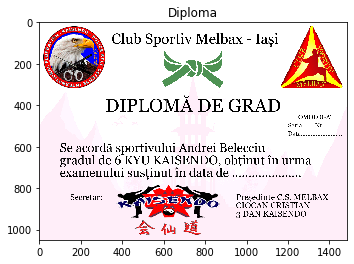

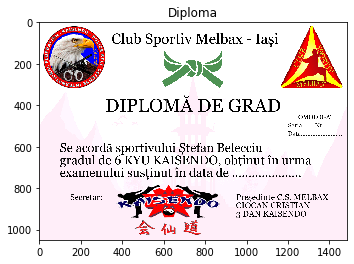

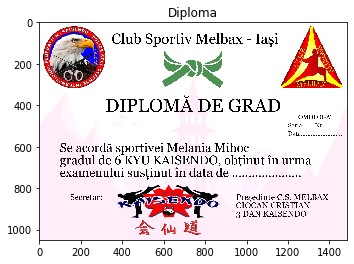

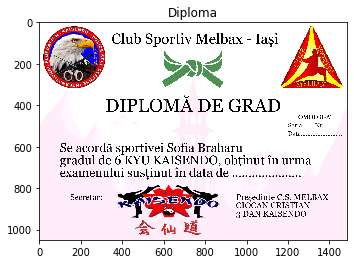

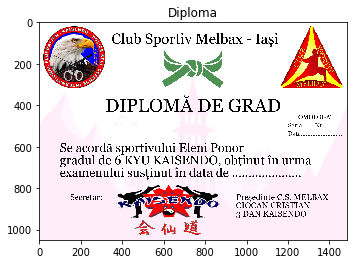

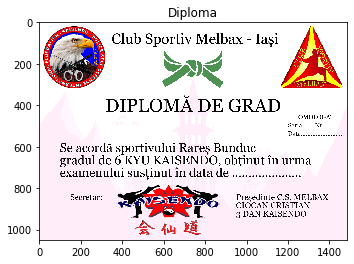

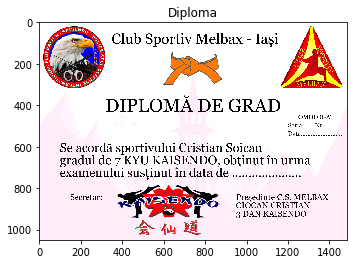

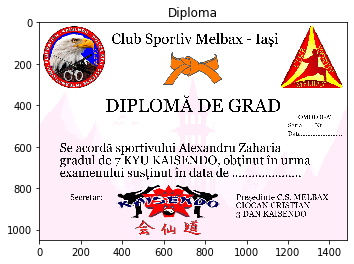

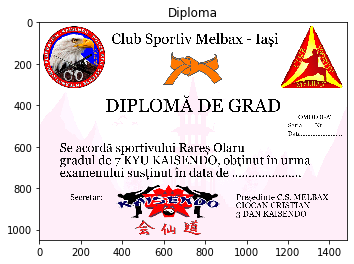

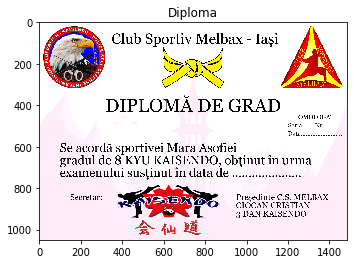

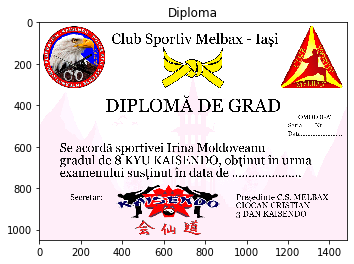

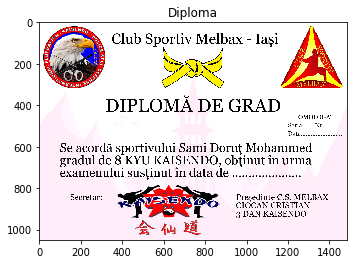

In [9]:
# Generate individual diplomas
font_path = "Library/Fonts/Georgia.ttf" 
pil_font = ImageFont.truetype(font_path, 60, encoding="unic")
for p in participants:
    diploma_with_text = np.copy(diploma)
    if p['rank_type'] == 'KYU' and p['rank'] == 8:
        belt = yellow_belt
    elif  p['rank_type'] == 'KYU' and p['rank'] == 7:
        belt = orange_belt
    elif  p['rank_type'] == 'KYU' and p['rank'] == 6:
        belt = green_belt
    else:
        print("Belt not found for {} {}".format(p['rank'],p['rank_type']))

    diploma_with_text = add_on_top(int(np.shape(diploma)[1]/2)-int(np.shape(belt)[1]/2), 
                                   120, diploma_with_text, belt)
    if p['gender'] == 'male':
        body_first_line = "Se acordă sportivului "
    else:
        body_first_line = "Se acordă sportivei "
    body_first_line += "{0} {1}".format(p['first_name'],p['last_name'])
    body_second_line = "gradul de {} {} {}, obținut în urma".format(p['rank'],p['rank_type'],MA_STYLE)
    body_third_line = "examenului susținut în data de {}.".format(p['date'])
    
    #cv2.putText(diploma_with_text, body_first_line, (100,620), font, 1.5, (0,0,0), 1, cv2.LINE_AA)
    #cv2.putText(diploma_with_text, body_second_line, (100,670), font, 1.5, (0,0,0), 1, cv2.LINE_AA)
    #cv2.putText(diploma_with_text, body_third_line, (100,720), font, 1.5, (0,0,0), 1, cv2.LINE_AA)
    
    img_pil = Image.fromarray(diploma_with_text)
    draw = ImageDraw.Draw(img_pil)
    draw.text((100, 570), body_first_line, font = pil_font, fill = (0, 0, 0, 1))
    draw.text((100, 630), body_second_line, font = pil_font, fill = (0, 0, 0, 1))
    draw.text((100, 690), body_third_line, font = pil_font, fill = (0, 0, 0, 1))
    diploma_with_text = np.array(img_pil)
    
    # Display
    plt.imshow(cv2.cvtColor(diploma_with_text, cv2.COLOR_BGR2RGB))
    plt.title('Diploma')
    plt.show()
    
    # Save to file
    cv2.imwrite("./diplomas/{}_{}_{}_{}.jpg".format(p['last_name'],p['first_name'],p['rank'],p['rank_type']), diploma_with_text)